In [1]:
from google.colab import files
uploads=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
#ml pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ml libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib
#settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("libraries loaded")

libraries loaded


STEP 1: DATA EXPLORARION

Data shape: (891, 12)
Features: 12
Samples: 891

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0           

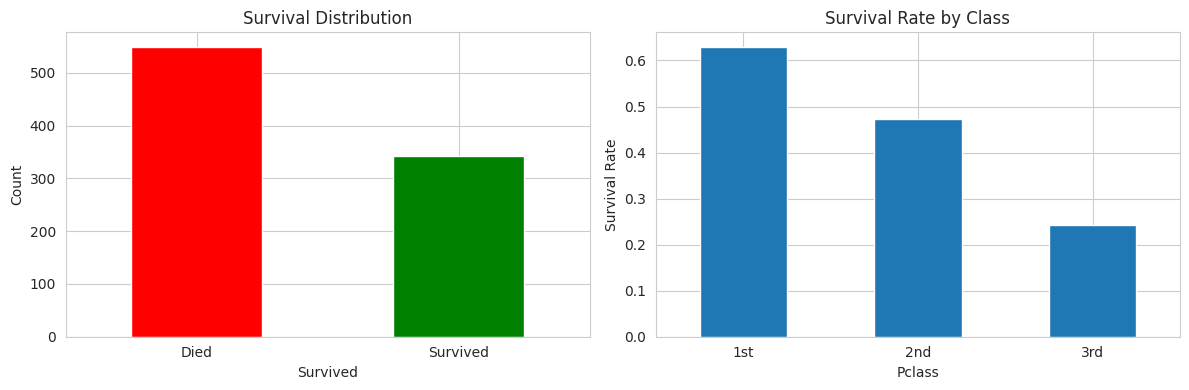

In [3]:
#step 1. data loading and exploration
df=pd.read_csv('Titanic-Dataset.csv')
print("="*60)
print("STEP 1: DATA EXPLORARION")
print("="*60)

#basic info
print(f"\nData shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Samples: {df.shape[0]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
missing=df.isnull().sum()
print(missing[missing>0].sort_values(ascending=False))

print("\nTarget Variable Distribution:")
print(df['Survived'].value_counts())
print(f"Survival rate: {df['Survived'].mean():.2%}")
#visualize target
fig, ax=plt.subplots(1,2,figsize=(12,4))
df['Survived'].value_counts().plot(kind='bar',ax=ax[0],color=['red','green'])
ax[0].set_title('Survival Distribution')
ax[0].set_xticklabels(['Died','Survived'],rotation=0)
ax[0].set_ylabel('Count')

df.groupby('Pclass')['Survived'].mean().plot(kind='bar',ax=ax[1])
ax[1].set_title('Survival Rate by Class')
ax[1].set_ylabel('Survival Rate')
ax[1].set_xticklabels(['1st','2nd','3rd'],rotation=0)

plt.tight_layout()
plt.show()


In [4]:
#step 2: Data Cleaning
print("="*60)
print("STEP 2: DATA CLEANING")
print("="*60)

#creating clean dataframe
df_clean=df.copy()

#selecting relevant features
features_to_keep=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']
df_clean=df_clean[features_to_keep]

print(f"Features selected: {len(features_to_keep)-1}")

#handle missing values
print("\nHandling missing values:")
print(f"Age missing: {df_clean['Age'].isnull().sum()}")

df_clean['Age']=df_clean['Age'].fillna(df_clean['Age'].median())

print("Filled age with median")

#encode categorical
print("\nEncoding categorical variables:")
df_clean['Sex']=df_clean['Sex'].map({'male':1,'female':0})
print("sex encoded: male=1, female=0")

#check for remaining missing values
remaining_missing=df_clean.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")

#final shape
print(f"\nClean dataset shape: {df_clean.shape}")

print("\nStep 2 complete: data cleaned")

STEP 2: DATA CLEANING
Features selected: 6

Handling missing values:
Age missing: 177
Filled age with median

Encoding categorical variables:
sex encoded: male=1, female=0

Remaining missing values: 0

Clean dataset shape: (891, 7)

Step 2 complete: data cleaned


Step 3: Feature Analysis

Features (X): (891, 6)
Target (y): (891,)

 Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.064910
Pclass   -0.338481
Sex      -0.543351
Name: Survived, dtype: float64


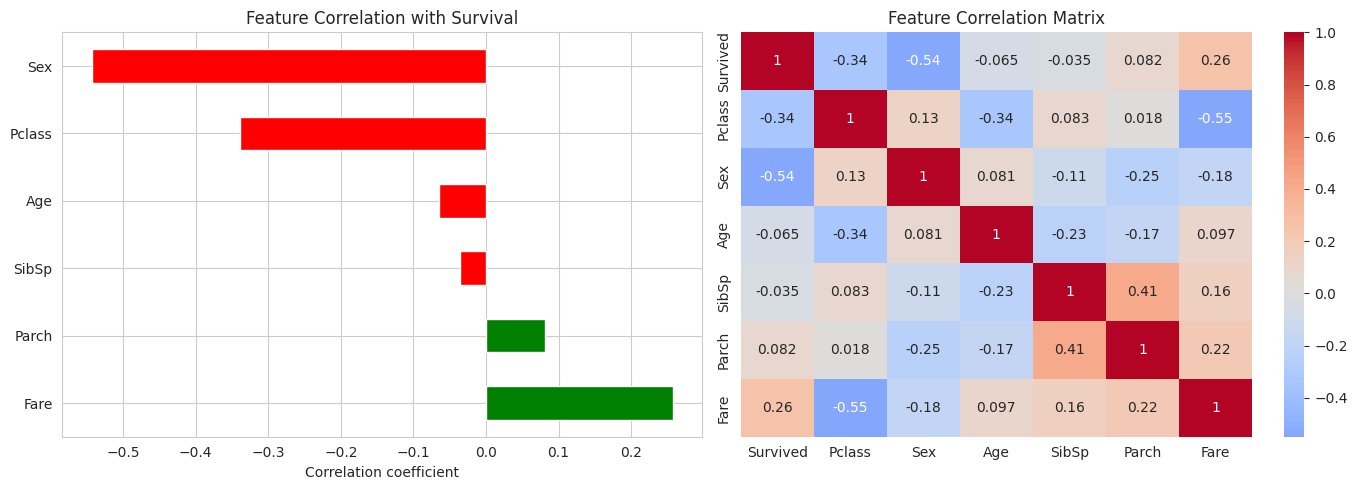

In [5]:
#step 3: feature analysis
print("="*60)
print("Step 3: Feature Analysis")
print("="*60)

#separate features and target
X=df_clean.drop('Survived',axis=1)
y=df_clean['Survived']

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")

#correlation analysis
correlation=df_clean.corr()['Survived'].drop('Survived').sort_values(ascending=False)
print("\n",correlation)

#visualize correlations
fig, axes=plt.subplots(1,2, figsize=(14,5))

#correlation bar plot
correlation.plot(kind='barh',ax=axes[0],color=['green' if x>0 else 'red' for x in correlation])
axes[0].set_title('Feature Correlation with Survival')
axes[0].set_xlabel('Correlation coefficient')

#correlation heatmap
sns.heatmap(df_clean.corr(),annot=True,cmap='coolwarm',center=0,ax=axes[1])
axes[1].set_title("Feature Correlation Matrix")

plt.tight_layout()
plt.show()

Step 4: Model Selection And Comparison

Training set: 712 samples
Test set: 179 samples

Training and evaluating models...

Logistic Regression:
Accuracy= 0.8101
Classification report:
              precision    recall  f1-score   support

        Died       0.81      0.88      0.84       105
    Survived       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Decision Tree:
Accuracy= 0.7542
Classification report:
              precision    recall  f1-score   support

        Died       0.79      0.79      0.79       105
    Survived       0.70      0.70      0.70        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179


Random Forest:
Accuracy= 0.7989
Classification report:
              precision    recall  f1-score   sup

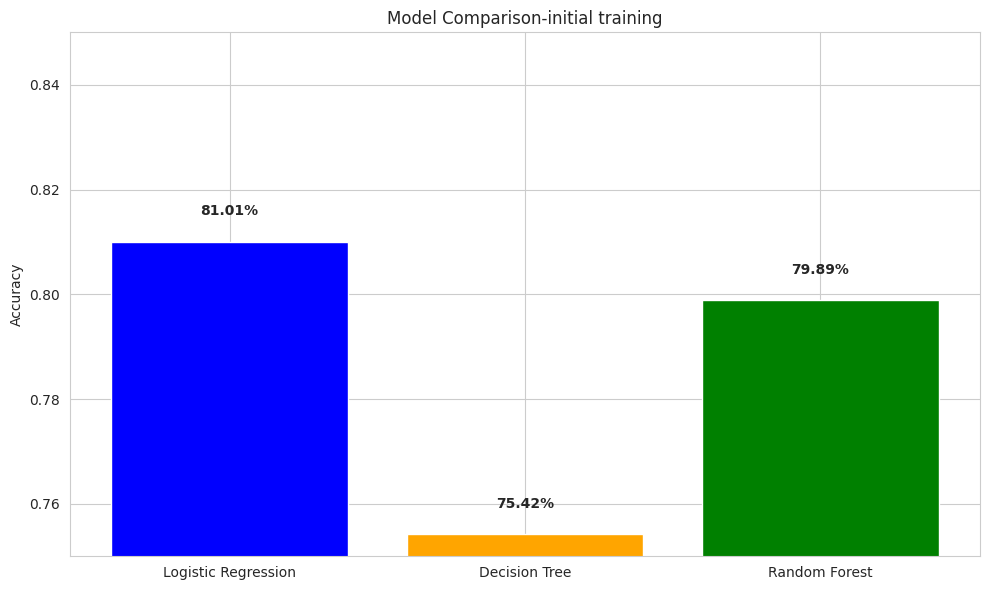


Step 4 Complete: Best initial model = Logistic Regression (0.8101)


In [6]:
#step 4: model selection and comparison
print("="*60)
print("Step 4: Model Selection And Comparison")
print("="*60)

#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

#define models to compare
models={
    'Logistic Regression': LogisticRegression(random_state=42,max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42,n_estimators=100)

}

#trainn and evaluate each
results={}

print("\nTraining and evaluating models...\n")

for name,model in models.items():
  #train
  model.fit(X_train,y_train)

  #predict
  y_pred=model.predict(X_test)

  #evaluate
  accuracy=accuracy_score(y_test,y_pred)
  results[name]=accuracy

  print(f"{name}:")
  print(f"Accuracy= {accuracy:.4f}")
  print(f"Classification report:")
  print(classification_report(y_test,y_pred,target_names=['Died','Survived']))
  print()

#visualize comparison
plt.figure(figsize=(10,6))
plt.bar(results.keys(),results.values(),color=['blue','orange','green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison-initial training')
plt.ylim(0.75,0.85)

for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.005, f'{acc:.2%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

best_model = max(results, key=results.get)
print(f"\nStep 4 Complete: Best initial model = {best_model} ({results[best_model]:.4f})")

Step 5: Cross validation

Performing 5-fold cross validation on all models

Logistic Regression:
  CV Scores: [0.7877095  0.7752809  0.78089888 0.75842697 0.82022472]
  Mean: 0.7845
  Std: 0.0203
  Range: 0.7584 - 0.8202

Decision Tree:
  CV Scores: [0.7150838  0.78089888 0.80898876 0.75842697 0.80898876]
  Mean: 0.7745
  Std: 0.0352
  Range: 0.7151 - 0.8090

Random Forest:
  CV Scores: [0.77094972 0.80898876 0.86516854 0.78089888 0.83146067]
  Mean: 0.8115
  Std: 0.0343
  Range: 0.7709 - 0.8652



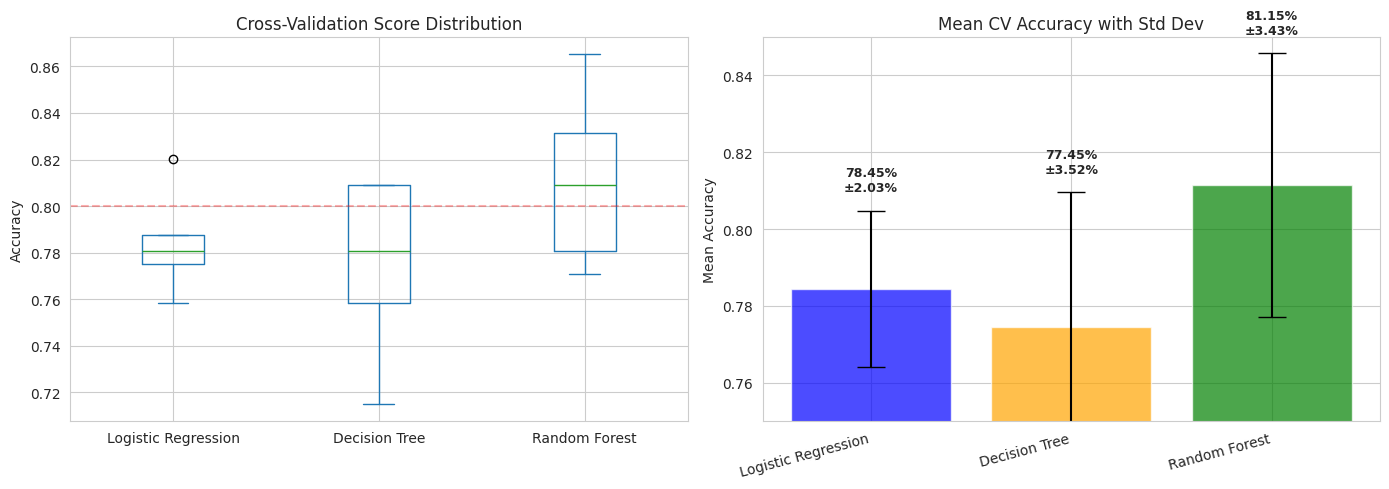

Step 5 Complete: Best CV model = Random Forest (0.8115)


In [7]:
#step 5: cross validation
print("="*60)
print("Step 5: Cross validation")
print("="*60)

print("\nPerforming 5-fold cross validation on all models\n")

cv_results={}

for name,model in models.items():
  #5-fold cv
  cv_scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')
  cv_results[name]=cv_scores

  print(f"{name}:")
  print(f"  CV Scores: {cv_scores}")
  print(f"  Mean: {cv_scores.mean():.4f}")
  print(f"  Std: {cv_scores.std():.4f}")
  print(f"  Range: {cv_scores.min():.4f} - {cv_scores.max():.4f}")
  print()

# Visualize CV results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
cv_df = pd.DataFrame(cv_results)
cv_df.plot(kind='box', ax=axes[0])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Cross-Validation Score Distribution')
axes[0].axhline(y=0.8, color='r', linestyle='--', alpha=0.3)

# Mean with error bars
means = [scores.mean() for scores in cv_results.values()]
stds = [scores.std() for scores in cv_results.values()]
names = list(cv_results.keys())

axes[1].bar(range(len(names)), means, yerr=stds, capsize=10,
            color=['blue', 'orange', 'green'], alpha=0.7)
axes[1].set_xticks(range(len(names)))
axes[1].set_xticklabels(names, rotation=15, ha='right')
axes[1].set_ylabel('Mean Accuracy')
axes[1].set_title('Mean CV Accuracy with Std Dev')
axes[1].set_ylim([0.75, 0.85])

for i, (mean, std) in enumerate(zip(means, stds)):
    axes[1].text(i, mean + std + 0.005, f'{mean:.2%}\n±{std:.2%}',
                ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Best model by CV
best_cv_model = max(cv_results, key=lambda x: cv_results[x].mean())
best_cv_score = cv_results[best_cv_model].mean()

print(f"Step 5 Complete: Best CV model = {best_cv_model} ({best_cv_score:.4f})")

In [17]:
#step 6: hyperparameter tuning
print("="*60)
print("Step 6: Hyperparameter tuning")
print("="*60)

print("\nTuning Random Forest(best cv model)")

#define parameter grid
param_grid={
      'n_estimators':[50,100,200],
      'max_depth': [5,10,15,None],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]
}

total_combos=(
    len(param_grid['n_estimators'])*
    len(param_grid['max_depth'])*
    len(param_grid['min_samples_split'])*
    len(param_grid['min_samples_leaf'])
)

print(f"Testing {total_combos} combinations with 5-fold cv....")
print("This may take 1-2 minutes..\n")

#grid search
rf=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(
    estimator=rf,
    cv=5,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

grid_search.fit(X,y)

print("="*60)
print("Best Hyperparameters found:")
print("="*60)
for param,value in grid_search.best_params_.items():
  print(f"{param}: {value}")

print("="*60)
print("Perfomance Comparison")
print("="*60)
print(f"Random Forest (default): {cv_results['Random Forest'].mean():.4f}")
print(f"Random Forest (tuned):   {grid_search.best_score_:.4f}")
print(f"Improvement: {(grid_search.best_score_ - cv_results['Random Forest'].mean())*100:+.2f}%")
print("="*60)

#save best model
best_model_final=grid_search.best_estimator_

print(f"Step 6 complete: Model tuned to {grid_search.best_score_:.4f} accuracy")

Step 6: Hyperparameter tuning

Tuning Random Forest(best cv model)
Testing 108 combinations with 5-fold cv....
This may take 1-2 minutes..

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters found:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 100
Perfomance Comparison
Random Forest (default): 0.8115
Random Forest (tuned):   0.8384
Improvement: +2.69%
Step 6 complete: Model tuned to 0.8384 accuracy


Step 7: Final Model Evaluation

Final model: Tuned Random forest
5-Fold CV Scores: [0.79888268 0.82022472 0.89325843 0.82022472 0.85955056]
Mean Accuracy: 0.8384
Std Deviation: 0.0337

Feature importance rankings:
  Features  Importance
1      Sex    0.350191
5     Fare    0.242880
2      Age    0.201886
0   Pclass    0.112777
3    SibSp    0.052901
4    Parch    0.039365


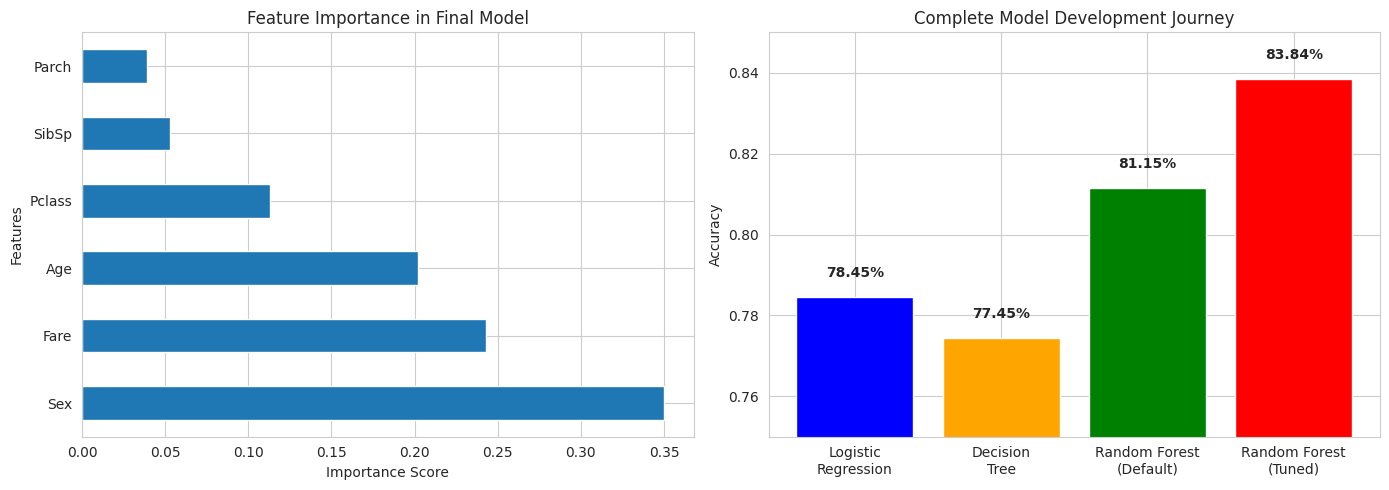


Step 7 Complete: Final model achieves 0.8384 accuracy


In [28]:
#step 7: final model evaluation
print("="*60)
print("Step 7: Final Model Evaluation")
print("="*60)

#train on full dataset, evaluate with cv
final_cv_scores=cross_val_score(best_model_final,X,y,cv=5,scoring='accuracy')

print("\nFinal model: Tuned Random forest")
print(f"5-Fold CV Scores: {final_cv_scores}")
print(f"Mean Accuracy: {final_cv_scores.mean():.4f}")
print(f"Std Deviation: {final_cv_scores.std():.4f}")

#Train on all data for deployment
best_model_final.fit(X,y)

#Feature importance
feature_importance=pd.DataFrame({
    'Features':X.columns,
    'Importance':best_model_final.feature_importances_
}).sort_values('Importance',ascending=False)

print("\nFeature importance rankings:")
print(feature_importance)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Feature importance
feature_importance.plot(x='Features', y='Importance', kind='barh', ax=axes[0], legend=False)
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Feature Importance in Final Model')

# Complete journey
journey = {
    'Model': ['Logistic\nRegression', 'Decision\nTree', 'Random Forest\n(Default)', 'Random Forest\n(Tuned)'],
    'Accuracy': [cv_results['Logistic Regression'].mean(),
                 cv_results['Decision Tree'].mean(),
                 cv_results['Random Forest'].mean(),
                 grid_search.best_score_]
}

axes[1].bar(journey['Model'], journey['Accuracy'], color=['blue', 'orange', 'green', 'red'])
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Complete Model Development Journey')
axes[1].set_ylim([0.75, 0.85])

for i, acc in enumerate(journey['Accuracy']):
    axes[1].text(i, acc + 0.005, f'{acc:.2%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nStep 7 Complete: Final model achieves {final_cv_scores.mean():.4f} accuracy")

In [51]:
#step 7: model persistence
print("="*60)
print("Step 7: Model Persistence")
print("="*60)

#save the model
model_filename='titanic_survival_model.pkl'
joblib.dump(best_model_final,model_filename)
print(f"\nmodel saved as :{model_filename}")

#save feature names
feature_names=list(X.columns)
joblib.dump(feature_names,'feature_names.pkl')
print("\nfeature names saved as: feature_names.pkl")

#test loading the model
loaded_model=joblib.load(model_filename)
loaded_features=joblib.load('feature_names.pkl')

print("\n"+"="*60)
print("Model Deployment Test")
print("="*60)

#make a prediction with loaded model
sample_passenger=X.iloc[0:1]
print("\nSample passenger feature")
print(sample_passenger)

prediction=loaded_model.predict(sample_passenger)[0]
probability=loaded_model.predict_proba(sample_passenger)[0]

print(f"Prediction: {'Survived' if prediction==1 else 'Died'}")
print(f"Confidence: {probability[1]:.1%} chance of survival")

print("\n" + "="*60)
print("PIPELINE COMPLETE!")
print("="*60)
print(f"Final Model: Tuned Random Forest")
print(f"Accuracy: {grid_search.best_score_:.2%}")
print(f"Model saved and ready for deployment")
print("="*60)

Step 7: Model Persistence

model saved as :titanic_survival_model.pkl

feature names saved as: feature_names.pkl

Model Deployment Test

Sample passenger feature
   Pclass  Sex   Age  SibSp  Parch  Fare
0       3    1  22.0      1      0  7.25
Prediction: Died
Confidence: 11.9% chance of survival

PIPELINE COMPLETE!
Final Model: Tuned Random Forest
Accuracy: 83.84%
Model saved and ready for deployment
